# Notebook Setup

In [1]:
# Setting up with python 3.8.10
! pip install zfit==0.5.6 > /dev/null
! pip install mplhep > /dev/null
! pip install seaborn > /dev/null
! pip install numpy==1.19.5 > /dev/null
! pip install protobuf==3.20.0 > /dev/null

ERROR: -ensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.22.0 which is incompatible.
ERROR: tensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.22.0 which is incompatible.
ERROR: -ensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorboard 2.13.0 has requirement grpcio>=1.48.2, but you'll have grpcio 1.46.1 which is incompatible.
ERROR: seaborn 0.13.0 has requirement numpy!=1.24.0,>=1.20, but you'll have numpy 1.19.5 which is incompatible.
ERROR: -ensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorflow 2.3.4 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: tensorboard 2.13.0 has requirement grpcio>=1.48.2, but you'll have grpcio 1.46.1

In [2]:
# Importing python libraries
import sys
import os
import time
import numpy as np
import pandas as pd
import zfit
import matplotlib.pyplot as plt
from pathlib import Path

2023-12-04 23:26:25.085287: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2023-12-04 23:26:25.085351: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-04 23:26:26.192145: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-04 23:26:26.192215: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-04 23:26:26.192234: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-KJ9UEOTB): /proc/driver/nvidia/version does not exist
2023-12-04 23:26:26.192482: I tensorflow/core/platform/cpu_fe

In [3]:
# Adding to path custom libraries
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[1] / "py")

if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
# Importing custom libraries
import plot_tools
import customPDFs

In [5]:
# Minimizer import
import SLSQP_zfit

In [6]:
# Relative path to get the samplers

path = './samplers/'

# Zfit Configuration

In [7]:
# Setting the seed for zfit, to ensure equality of conditions
zfit.settings.set_seed(seed=42)

In [8]:
# Parameter space for the cosine
cos = zfit.Space('cosThetaKMu', [-1,1])

In [9]:
cos_np = np.linspace(-1, 1, 1000)

In [10]:
# Setting the parameters with initial values
AFB = zfit.Parameter('AFB', 0)
FH = zfit.Parameter('FH', 0)

In [11]:
param_index = 2

In [12]:
# Sampler size of 100,000 events = 1e5
sampler_size = 1e5

In [13]:
# Creating the PDF with the selected parameters
decay_rate = customPDFs.decayWidth(AFB, FH, cos) # Crea una PDF del Base PDF de zfit

In [14]:
AFB_lst = [0, 0.25, -0.25, 0, -0.25, -0.7, 0.8]
FH_lst = [0, 0.5, 0.5, 1.5, 2.5, 1.5, 1.5]

In [15]:
# Creating a list of decay rates to store all the PDFs
decay_rate_lst = []

Text(1, 0, '$\\cos\\theta_{\\ell}$')

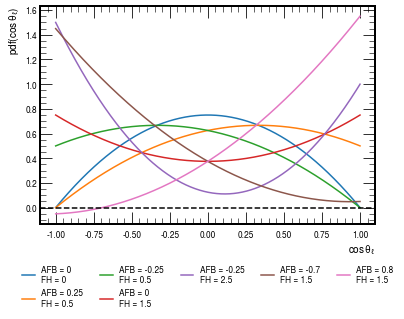

In [16]:
fig = plt.figure()
ax = plt.subplot(111)

for afb,fh in zip(AFB_lst, FH_lst):
    AFB.set_value(afb)
    FH.set_value(fh)
    decay_rate_lst.append(customPDFs.decayWidth(AFB, FH, cos))
    plt.plot(cos_np, decay_rate_lst[-1].pdf(cos_np), label=f'AFB = {afb}\nFH = {fh}')

AFB.set_value(0), FH.set_value(0)
#plt.plot(cos_np, decay_rate.pdf(cos_np), label=f'AFB = {0}\nFH = {0.02}', linewidth=5, color='black', ls='-')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 1])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.axhline(0, color='black', ls='--')
plt.ylabel(r'pdf($\cos\theta_{\ell}$)')
plt.xlabel(r'$\cos\theta_{\ell}$')

In [17]:
# Creating the sampler list
sampler_lst = []

In [18]:
decay_rate_lst[6].params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0>)])

In [19]:
decay_rate_lst[3].params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=0>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0>)])

In [20]:
AFB.set_value(AFB_lst[param_index])
FH.set_value(FH_lst[param_index])
dr = customPDFs.decayWidth(AFB, FH, cos)

In [21]:
dr.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=-0.25>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.5>)])

(array([5345., 5668., 5983., 6258., 6419., 6503., 6609., 6732., 6515.,
        6461., 6156., 5727., 5396., 4900., 4383., 3678., 3081., 2291.,
        1395.,  500.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

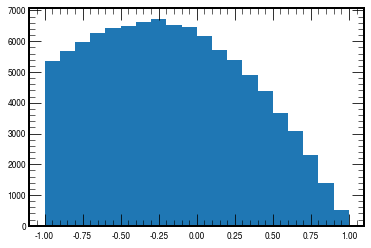

In [22]:
# Generating and saving the sampler
#dr = decay_rate_lst[2]

AFB_val = dr.params['AFB'].value().numpy()
FH_val = dr.params['FH'].value().numpy()

AFB.set_value(AFB_val), FH.set_value(FH_val)

filename = f'{path}drs_AFB_{AFB_val}_FH_{FH_val}.npy'

# The PDf doesn´t save the values of the parameters themselves
# AFB.set_value(decay_rate_lst[-1].params['AFB'].value().numpy())
# FH.set_value(decay_rate_lst[-1].params['FH'].value().numpy())

sampler = dr.create_sampler(sampler_size)

if os.path.exists(filename):
    #sampler_lst.append(sampler.from_numpy(cos, np.load(filename)))
    sampler = sampler.from_numpy(cos, np.load(filename))
else:
    sampler.resample()
    np.save(filename, sampler.numpy())
    #sampler_lst.append(sampler)
#print(sampler_lst[-1])
# 
plt.hist(sampler.numpy(), bins=20, range=[-1,1])
        

# Minimization

In [23]:
ftol_lst = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10]

In [24]:
nll = zfit.loss.UnbinnedNLL(dr, sampler)

In [25]:
# Initial parameters

AFB.set_value(0.5)
FH.set_value(2.5)

In [26]:
# Creating a pandas dataframe to store results

result_df = pd.DataFrame(columns=['Minimizer', 'tol', 'AFB', 'hessAFB', 'FH', 'hessFH', 'time'])

## Minuit Minimization

In [27]:
MIN = zfit.minimize.Minuit()

# Minimization time =====================================
start = time.time()
# Minimization with zfit minuit
minimum = MIN.minimize(nll)
print(minimum)

end = time.time()
time_dif = end - start
print("Minimization time with Minuit", time_dif)

# Hessian error calculator time =========================
start_h = time.time()

minimum.hesse()

end_h = time.time()
print("Hessian error time with Minuit", end_h - start_h)

result_df.loc[1] = ['Minuit', 
                     '1e-3',  
                     round(minimum.params[AFB]['value'], 8),
                     round(minimum.hesse()[AFB]['error'],8),
                     round(minimum.params[FH]['value'], 8),
                     round(minimum.hesse()[FH]['error'],8),
                     time_dif] 

/home/carlos/.local/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 6.064e+04                  │         Nfcn = 75 (75 total)         │
│ EDM = 0.000185 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
FitResult of
<UnbinnedNLL model=[<zfit.decayWidth  params=[AFB, FH] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f17bef3a550>] constraints=[]> 
with
<Minuit strategy=PushbackStrategy tolerance=0.001>

╒═════════╤═════════════╤══

In [28]:
result_df

,Minimizer,tol,AFB,hessAFB,FH,hessFH,time
1,Minuit,1e-3,-0.250189,0.00203,0.502189,0.00461,0.552544


# SLSQP_zfit minimization

In [29]:
# AFB.set_value(AFB_lst[2])
# FH.set_value(FH_lst[2])
# dr = customPDFs.decayWidth(AFB, FH, cos)

In [30]:
# constraints = SLSQP_zfit.create_constraint(dr) #una constraint se crea con una pdf
# # Constraints are a dictionary with 'type' and 'fun' arguments
# # Creates a new minimizer implementation from the base minimizer

In [31]:
dr.params

OrderedDict([('AFB', <zfit.Parameter 'AFB' floating=True value=-0.2502>),
             ('FH', <zfit.Parameter 'FH' floating=True value=0.5022>)])

In [32]:
# AFB.set_value(AFB_lst[2])
# FH.set_value(FH_lst[2])
# dr = customPDFs.decayWidth(AFB, FH, cos)

In [33]:
constraints = SLSQP_zfit.create_constraint(dr)

0 1


In [34]:
# Esto devolvía un error al correr en versiones anteriores
# El error indica lo siguiente:
# NotImplementedError: Cannot convert a symbolic Tensor (gradients/gradients/AddN_16/inputs_1_grad/sub:0) to a numpy array. 
# This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

# Solución encontrada en Stack Overflow:
# https://stackoverflow.com/questions/58479556/notimplementederror-cannot-convert-a-symbolic-tensor-2nd-target0-to-a-numpy

# numpy==1.19.5

# Minimization time for SLSQP_zfit =============================

index_count = 2

for ft in ftol_lst:

    AFB.set_value(AFB_lst[param_index])
    FH.set_value(FH_lst[param_index])
    dr = customPDFs.decayWidth(AFB, FH, cos)

    nll = zfit.loss.UnbinnedNLL(dr, sampler)

    AFB.set_value(0.5)
    FH.set_value(2.5)

    constraints = SLSQP_zfit.create_constraint(dr)
    
    print("===============================================================")
    print("===============================================================")
    print(f'\n                      ftol = {ft}                      \n')
    print("===============================================================")
    print("===============================================================")
    
    start = time.time()
    SLSQP = SLSQP_zfit.SLSQP(constraints=constraints, ftol=ft)
    minimum = SLSQP.minimize(nll)
    print(minimum)
    
    end = time.time()

    time_dif = end - start
    
    # Hessian error calculation for SLSQP_zfit =====================
    print("Minimization time with SLSQP zfit", end - start)
    
    start = time.time()
    
    minimum.hesse()
    
    end = time.time()
    print("Hessian error time with SLSQP zfit", end - start)

    result_df.loc[index_count] = ['zfit 0.5.6', 
                         "{:.3g}".format(ft),  
                         round(minimum.params[AFB]['value'], 8),
                         round(minimum.hesse()[AFB]['error'],8),
                         round(minimum.params[FH]['value'], 8),
                         round(minimum.hesse()[FH]['error'],8),
                         time_dif] 

    index_count += 1

0 1

                      ftol = 0.01                      

ftol = 0.01


/home/carlos/.local/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


FitResult of
<UnbinnedNLL model=[<zfit.decayWidth  params=[AFB, FH] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f17bef3a550>] constraints=[]> 
with
<function minimize at 0x7f187c12eee0>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ -1    │ 1.424e+05   │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
AFB         0.5       False
FH          2.5       False
Minimization time with SLSQP zfit 0.16523027420043945
Hessian error time with SLSQP zfit 1.4793570041656494
0 1

                      ftol = 0.0001                      

ftol = 0.0001


/home/carlos/.local/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


FitResult of
<UnbinnedNLL model=[<zfit.decayWidth  params=[AFB, FH] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f17bef3a550>] constraints=[]> 
with
<function minimize at 0x7f187c12eee0>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ -1    │ 1.424e+05   │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
AFB         0.5       False
FH          2.5       False
Minimization time with SLSQP zfit 0.16643166542053223
Hessian error time with SLSQP zfit 1.4289677143096924
0 1

                      ftol = 1e-06                      

ftol = 1e-06


/home/carlos/.local/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


FitResult of
<UnbinnedNLL model=[<zfit.decayWidth  params=[AFB, FH] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f17bef3a550>] constraints=[]> 
with
<function minimize at 0x7f187c12eee0>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ -1    │ 1.424e+05   │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
AFB         0.5       False
FH          2.5       False
Minimization time with SLSQP zfit 0.1932668685913086
Hessian error time with SLSQP zfit 1.600311040878296
0 1

                      ftol = 1e-08                      

ftol = 1e-08


/home/carlos/.local/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


FitResult of
<UnbinnedNLL model=[<zfit.decayWidth  params=[AFB, FH] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f17bef3a550>] constraints=[]> 
with
<function minimize at 0x7f187c12eee0>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ -1    │ 1.424e+05   │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
AFB         0.5       False
FH          2.5       False
Minimization time with SLSQP zfit 0.17517757415771484
Hessian error time with SLSQP zfit 1.5888986587524414
0 1

                      ftol = 1e-10                      

ftol = 1e-10


/home/carlos/.local/lib/python3.8/site-packages/zfit/util/cache.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return all(np.equal(self.immutable_representation, other.immutable_representation))


FitResult of
<UnbinnedNLL model=[<zfit.decayWidth  params=[AFB, FH] dtype=float64>0] data=[<zfit.core.data.Data object at 0x7f17bef3a550>] constraints=[]> 
with
<function minimize at 0x7f187c12eee0>

╒═════════╤═════════════╤══════════════════╤═══════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm   │ min value   │
╞═════════╪═════════════╪══════════════════╪═══════╪═════════════╡
│ True    │ True        │ False            │ -1    │ 1.424e+05   │
╘═════════╧═════════════╧══════════════════╧═══════╧═════════════╛

Parameters
name      value    at limit
------  -------  ----------
AFB         0.5       False
FH          2.5       False
Minimization time with SLSQP zfit 0.15565156936645508
Hessian error time with SLSQP zfit 1.372443437576294


In [35]:
round(minimum.params[AFB]['value'], 8)

0.5

In [36]:
dir(minimum)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache_errors',
 '_converged',
 '_covariance',
 '_covariance_dict',
 '_default_error',
 '_default_hesse',
 '_edm',
 '_error',
 '_error_methods',
 '_fmin',
 '_get_uncached_params',
 '_hesse',
 '_hesse_methods',
 '_info',
 '_input_check_params',
 '_input_check_reset_params',
 '_input_convert_params',
 '_loss',
 '_minimizer',
 '_params',
 '_params_at_limit',
 '_repr_pretty_',
 '_status',
 '_valid',
 'converged',
 'correlation',
 'covariance',
 'edm',
 'error',
 'errors',
 'fmin',
 'from_minuit',
 'hesse',
 'info',
 'loss',
 'minimizer',
 'params',
 'params_at_limit',
 'status',
 'valid']

In [37]:
round(minimum.hesse()[AFB]['error'],8)

0.00170898

In [38]:
result_df

,Minimizer,tol,AFB,hessAFB,FH,hessFH,time
1,Minuit,1e-3,-0.250189,0.002030,0.502189,0.004610,0.552544
2,zfit 0.5.6,0.01,0.500000,0.001709,2.500000,0.002494,0.165230
3,zfit 0.5.6,0.0001,0.500000,0.001709,2.500000,0.002494,0.166432
4,zfit 0.5.6,1e-06,0.500000,0.001709,2.500000,0.002494,0.193267
5,zfit 0.5.6,1e-08,0.500000,0.001709,2.500000,0.002494,0.175178
6,zfit 0.5.6,1e-10,0.500000,0.001709,2.500000,0.002494,0.155652
